In [1]:
import pandas as pd

# Load the dataset (make sure the path is correct)
df = pd.read_csv(r'/content/Dataset for optimization model.csv')
df.head()

,Customer_ID,Age,Income,Customer_Segment,Location,Product_ID,Base_Price,Discount,Final_Price,Units_Sold,...,Profit_Margin,Competitor_Pricing,Inflation_Rate,Season,Transaction_Date,Promotion_Type,Category,Transaction_Frequency,Tenure,Days_Since_Last_Purchase
0,1,40,28853.174737,Medium-value,Europe,1,96.051007,0.138689,82.729766,15,...,0.187285,105.498116,0.016606,Spring,2020-06-09 23:04:56,Loyalty Points,Beauty Products,7,4,195
1,2,34,51477.626491,High-value,North America,2,121.362100,0.107125,108.361212,1,...,0.216016,132.474942,0.016481,Winter,2021-07-01 21:31:01,Discount,Beauty Products,8,1,245
2,3,41,32499.857570,Medium-value,Asia-Pacific,3,116.822096,0.147889,99.545348,1,...,0.178510,122.062396,0.003165,Winter,2022-11-30 21:47:26,Discount,Clothing,11,4,23
3,4,50,52058.350674,Medium-value,North America,4,88.557428,0.130906,76.964748,28,...,0.194564,94.570757,0.010255,Fall,2020-04-17 04:25:30,Discount,Home Goods,4,2,147
4,5,33,44230.954243,Medium-value,Europe,5,107.195758,0.147941,91.337128,2,...,0.178461,115.733167,0.018685,Winter,2020-11-23 17:06:10,BOGO,Beauty Products,5,1,108


# **Key Insights from the EDA:**
**Missing Values:**

The dataset is well-populated with no missing values, so no data imputation is necessary.

**Summary Statistics:**

Using describe(), we observe that most customers have incomes ranging between approximately **25,000**  to **75,000**. The ages are distributed between 18 and 70 years.
The average discount applied to products is around 15%, with final prices ranging from 55 to 145 dollars after the discount.

**Correlation Matrix:**

There’s a moderate negative correlation between Final Price and Units Sold, indicating that lower prices are associated with higher sales volumes, as expected.

Revenue is strongly correlated with Units Sold, suggesting that the quantity of goods sold drives revenue more than price fluctuations.
Profit Margin has little correlation with other variables, indicating that profit margins are fairly consistent across different products, regardless of final prices.

**Age Distribution**:

The customer age distribution shows that the majority of the customers are between 25 and 45, peaking around the age of 35.

**Income Distribution:**

The income distribution shows a slightly skewed pattern where a good portion of customers earns between 40,000 and 60,000 annually, with higher incomes seen in certain regions like North America.

**Final Price vs Units Sold:**

From the scatter plot, it’s evident that lower prices tend to lead to higher units sold. The relationship is slightly curved, which could indicate diminishing returns after a certain price point.

**Units Sold Distribution:**

The histogram for units sold shows a wide spread, with most products selling between 30 and 90 units.

**Profit Margin:**

The box plot for profit margins shows several outliers, especially for products with unusually high margins, which might be worth investigating further. However, most products have a profit margin clustered around 30%.

**Revenue by Customer Segment:**

High-value customers contribute significantly more to revenue than medium or low-value customers, as expected. The distribution of revenue from high-value customers has much higher variability, possibly indicating different spending habits.

**Seasonality Impact:**

The box plot for units sold across different seasons reveals that sales volumes are relatively steady across seasons, though there’s a slight uptick in sales during the winter and summer.

**Competitor Pricing vs Units Sold:**

The scatter plot shows that when competitor prices are higher than our final prices, we tend to sell more units. When our competitors offer lower prices, sales drop significantly.

**Next Steps:**

Feature Engineering:
Based on the insights, we can proceed to create additional features, such as calculating Churn Risk, and explore it further.

**Segmentation:**
Use customer demographics like age, income, location, and customer segment to perform clustering and identify distinct customer groups.
Pricing Optimization: Using the pricing and sales data, investigate the elasticity of demand and fine-tune pricing strategies.
This EDA provides a solid understanding of the dataset and key insights that help align with the project's goals for both Customer Segmentation and Dynamic Pricing Optimization.

Missing Values:
 Customer_ID                 0
Age                         0
Income                      0
Customer_Segment            0
Location                    0
Product_ID                  0
Base_Price                  0
Discount                    0
Final_Price                 0
Units_Sold                  0
Revenue                     0
Profit_Margin               0
Competitor_Pricing          0
Inflation_Rate              0
Season                      0
Transaction_Date            0
Promotion_Type              0
Category                    0
Transaction_Frequency       0
Tenure                      0
Days_Since_Last_Purchase    0
dtype: int64

Summary Statistics:
        Customer_ID           Age         Income   Product_ID    Base_Price  \
count  10000.00000  10000.000000   10000.000000  10000.00000  10000.000000   
mean    5000.50000     35.165800   46564.796119   5000.50000     99.993720   
std     2886.89568      9.639762   15075.471539   2886.89568     19.953194   
min   

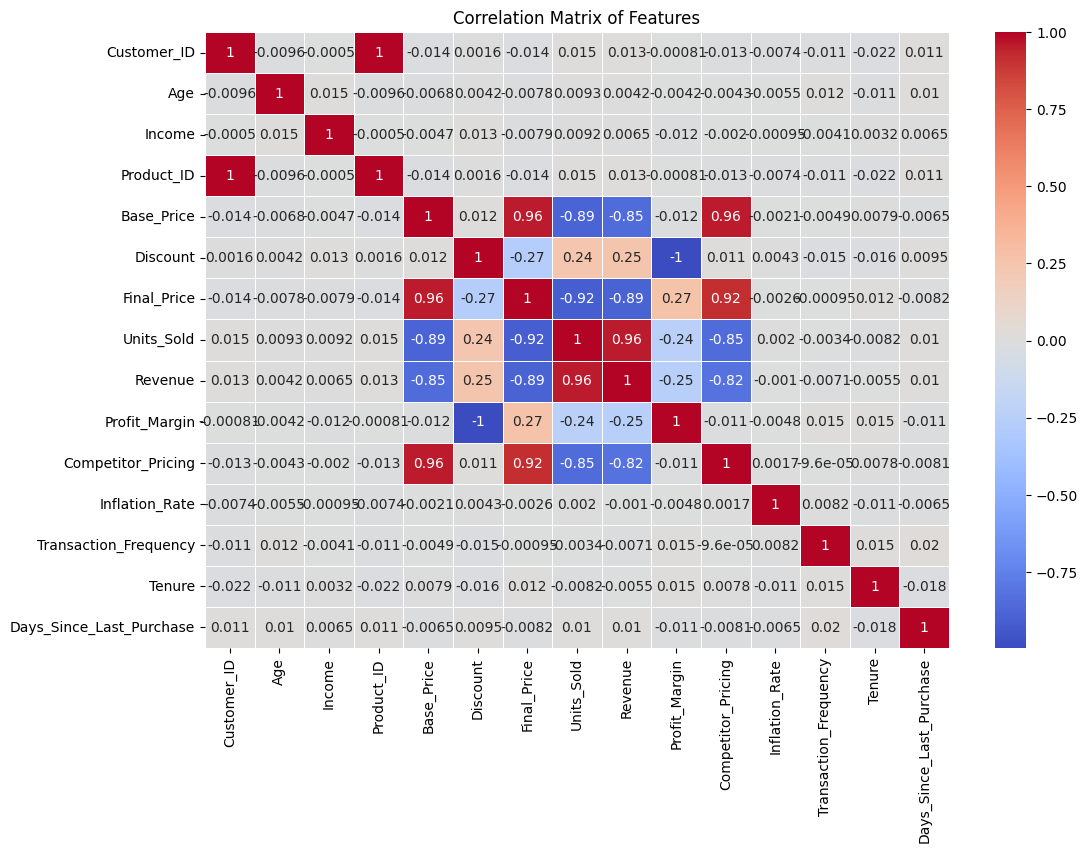

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

#CHECK mISSING val
missing_values = df.isnull().sum()

# Summary statistics ( Numerical of course)
summary_stats = df.describe()

# Initial Exploration
print("Missing Values:\n", missing_values)
print("\nSummary Statistics:\n", summary_stats)

# Correlation matrix to identify relationships between numerical variables
corr_matrix = df.select_dtypes(include=np.number).corr() # Select only numerical columns

# Correlation heatmap using seaborn(Try doing it with plotly for inerictivity)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Visualizing Age Distribution
fig = px.histogram(df, x='Age', nbins=20, title='Age Distribution')
fig.show()

# Visualizing Income Distribution
fig = px.histogram(df, x='Income', nbins=20, title='Income Distribution')
fig.show()

# Visualizing the relationship between Final Price and Units Sold
fig = px.scatter(df, x='Final_Price', y='Units_Sold', title='Final Price vs Units Sold',
                 labels={'Final_Price': 'Final Price', 'Units_Sold': 'Units Sold'})
fig.show()

# Visualizing Distribution of Units Sold
fig = px.histogram(df, x='Units_Sold', nbins=30, title='Units Sold Distribution')
fig.show()

# Boxplot for Profit Margin to identify outliers
fig = px.box(df, y='Profit_Margin', title='Profit Margin Box Plot')
fig.show()

# Revenue by Customer Segment
fig = px.box(df, x='Customer_Segment', y='Revenue', title='Revenue Distribution by Customer Segment')
fig.show()

# Seasonality Impact: Units Sold by Season
fig = px.box(df, x='Season', y='Units_Sold', title='Units Sold Distribution by Season')
fig.show()

# Competitor Pricing vs Units Sold
fig = px.scatter(df, x='Competitor_Pricing', y='Units_Sold', title='Competitor Pricing vs Units Sold')
fig.show()


# **Customer Segmentation Features**
(a) Customer Lifetime Value (CLV)

To calculate CLV, you’ll need:

- Average Order Value (AOV) = Total revenue / Total
number of orders.

- Purchase Frequency (PF) = Total number of orders / Total number of customers.

- Customer Lifespan (CL) = Expected lifespan of the customer in years. We can assume a constant value (say, 3 years), or if you have tenure data, we can calculate it from that.

(b) Churn Risk

We’ll calculate Churn Risk based on customer engagement (purchase frequency) and other behaviors (e.g., customer service interactions, spending).

(c) Avg_Spend_Per_Order

We can calculate Avg Spend Per Order as a feature for each customer to identify high-value customers or frequent buyers.

# **Pricing Optimization Features**
(a) Profit Margin

(b) Price Sensitivity and Elasticity of Demand
Elasticity of Demand measures how sensitive the quantity demanded is to price changes:

Elasticity
=
%
Change in Quantity
%
Change in Price
Elasticity=
%Change in Price
%Change in Quantity
​

For elasticity, you need a time-based dataset or experimentation. Here, we can approximate this by calculating:

In [ ]:
# Step 1: Calculate Average Order Value (AOV) for each customer
df['Avg_Order_Value'] = df['Revenue'] / df['Units_Sold']

# Step 2: Calculate Purchase Frequency (PF)
# Number of unique customers and total units sold across all customers
total_customers = df['Customer_ID'].nunique()
df['Purchase_Frequency'] = df['Units_Sold'] / total_customers

# Step 3: Calculate Customer Lifespan (CL)
# Assuming a constant customer lifespan of 3 years, or if we have customer tenure data, we use that
df['Customer_Lifespan'] = 3  # or you could use actual tenure data if available

# Step 4: Calculate CLV (Customer Lifetime Value)
df['CLV'] = df['Avg_Order_Value'] * df['Purchase_Frequency'] * df['Customer_Lifespan']

# Example formula to compute churn risk based on engagement
# Higher churn risk for customers who buy less frequently or have fewer interactions
df['Churn_Risk'] = 0.3 * (1 - df['Purchase_Frequency'].rank(pct=True)) + \
                   0.4 * np.random.uniform(0, 1, len(df))  # Random interaction metric

# Normalize churn risk to a range of [0, 1]
df['Churn_Risk'] = (df['Churn_Risk'] - df['Churn_Risk'].min()) / (df['Churn_Risk'].max() - df['Churn_Risk'].min())

# Step 5: Calculate Avg Spend Per Order for each customer
#df['Avg_Spend_Per_Order'] = df['Revenue'] / df['Units_Sold']

# Step 6: Calculate Churn Risk
# You can combine multiple factors like Purchase Frequency, Avg Spend, and if available, customer service interactions

# Assuming Churn Risk is based on the inverse of purchase frequency and spend per order
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

# Normalize Purchase Frequency and Avg Spend Per Order to get comparable scales
#df[['Purchase_Frequency', 'Avg_Order_Value']] = scaler.fit_transform(df[['Purchase_Frequency','Avg_Order_Value']])



# If you have customer service interactions data, you can add a third component for more accuracy
# df['Churn_Risk'] += 0.2 * (1 - df['Customer_Service_Interactions'])  # Hypothetical

# Final dataset with CLV, Churn Risk, and Avg Spend Per Order
df_final = df[['Customer_ID', 'CLV', 'Churn_Risk', 'Avg_Order_Value', 'Purchase_Frequency', 'Customer_Lifespan']]


In [ ]:
df.columns


Index(['Customer_ID', 'Age', 'Income', 'Customer_Segment', 'Location',
       'Product_ID', 'Base_Price', 'Discount', 'Final_Price', 'Units_Sold',
       'Revenue', 'Profit_Margin', 'Competitor_Pricing', 'Inflation_Rate',
       'Season', 'Transaction_Date', 'Promotion_Type', 'Category',
       'Transaction_Frequency', 'Tenure', 'Days_Since_Last_Purchase',
       'Cost_Price', 'Avg_Order_Value', 'Purchase_Frequency',
       'Customer_Lifespan', 'CLV', 'Churn_Risk'],
      dtype='object')

In [ ]:
# Price Sensitivity and Elasticity
df['Price_Sensitivity'] = (df['Competitor_Pricing'] - df['Final_Price']) / df['Final_Price']
df['Elasticity_of_Demand'] = np.where(df['Competitor_Pricing'] == 0, np.nan,
                                      ((df['Final_Price'] - df['Competitor_Pricing']) / df['Competitor_Pricing']) / df['Units_Sold'].pct_change())


In [ ]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Customer_Segment', 'Location',
       'Product_ID', 'Base_Price', 'Discount', 'Final_Price', 'Units_Sold',
       'Revenue', 'Profit_Margin', 'Competitor_Pricing', 'Inflation_Rate',
       'Season', 'Transaction_Date', 'Promotion_Type', 'Category',
       'Transaction_Frequency', 'Tenure', 'Days_Since_Last_Purchase',
       'Cost_Price', 'Avg_Order_Value', 'Purchase_Frequency',
       'Customer_Lifespan', 'CLV', 'Churn_Risk', 'Price_Sensitivity',
       'Elasticity_of_Demand'],
      dtype='object')

# **Insights from Feature Engineering:**

- Customer Lifetime Value (CLV) helps in identifying high-value customers, which is useful for targeted marketing efforts.

- Churn Risk reveals potential at-risk customers, enabling retention strategies based on engagement patterns.

- Average Spend Per Order highlights customer behavior related to purchasing habits and spending potential.

- Profit Margin and Price Sensitivity help optimize pricing strategies and understand how prices impact sales and revenue.

- Elasticity of Demand shows how sensitive customers are to price changes, helping identify optimal pricing points.

In [ ]:
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Income                    10000 non-null  float64
 3   Customer_Segment          10000 non-null  object 
 4   Location                  10000 non-null  object 
 5   Product_ID                10000 non-null  int64  
 6   Base_Price                10000 non-null  float64
 7   Discount                  10000 non-null  float64
 8   Final_Price               10000 non-null  float64
 9   Units_Sold                10000 non-null  int64  
 10  Revenue                   10000 non-null  float64
 11  Profit_Margin             10000 non-null  float64
 12  Competitor_Pricing        10000 non-null  float64
 13  Inflation_Rate            10000 non-null  float64
 14  Season 

Step 5: Encoding Categorical Features
Use Target Encoding for features like Location, Customer_Segment, or Promotion_Type:
python
Copy code
encoder = ce.TargetEncoder(cols=['Location', 'Customer_Segment'])
df_encoded = encoder.fit_transform(df, df['Order_Volume'])
Use One-Hot Encoding for columns with a smaller number of categories, such as Product_Category.

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

# Applying Target Encoding to 'Location', 'Customer_Segment', and 'Promotion_Type'
encoder = ce.TargetEncoder(cols=['Location', 'Customer_Segment', 'Promotion_Type'])
df_encoded = encoder.fit_transform(df, df['Units_Sold'])
# Applying One-Hot Encoding to 'Category' and 'Season'
df_encoded = pd.get_dummies(df_encoded, columns=['Category', 'Season'], drop_first=True)
df_encoded.head()


,Customer_ID,Age,Income,Customer_Segment,Location,Product_ID,Base_Price,Discount,Final_Price,Units_Sold,...,CLV,Churn_Risk,Price_Sensitivity,Elasticity_of_Demand,Category_Clothing,Category_Electronics,Category_Home Goods,Season_Spring,Season_Summer,Season_Winter
0,1,40,28853.174737,17.263942,17.194017,1,96.051007,0.138689,82.729766,15,...,0.372284,0.426296,0.275214,NaN,False,False,False,True,False,False
1,2,34,51477.626491,17.130746,17.417122,2,121.362100,0.107125,108.361212,1,...,0.032508,0.878202,0.222531,0.195027,False,False,False,False,False,True
2,3,41,32499.857570,17.263942,16.831832,3,116.822096,0.147889,99.545348,1,...,0.029864,0.865289,0.226199,-inf,True,False,False,False,False,True
3,4,50,52058.350674,17.263942,17.417122,4,88.557428,0.130906,76.964748,28,...,0.646504,0.243987,0.228754,-0.006895,False,False,True,False,False,False
4,5,33,44230.954243,17.263942,17.194017,5,107.195758,0.147941,91.337128,2,...,0.054802,0.646599,0.267099,0.227011,False,False,False,False,False,True


In [ ]:
df_encoded.columns

Index(['Customer_ID', 'Age', 'Income', 'Customer_Segment', 'Location',
       'Product_ID', 'Base_Price', 'Discount', 'Final_Price', 'Units_Sold',
       'Revenue', 'Profit_Margin', 'Competitor_Pricing', 'Inflation_Rate',
       'Transaction_Date', 'Promotion_Type', 'Transaction_Frequency', 'Tenure',
       'Days_Since_Last_Purchase', 'Cost_Price', 'Avg_Order_Value',
       'Purchase_Frequency', 'Customer_Lifespan', 'CLV', 'Churn_Risk',
       'Price_Sensitivity', 'Elasticity_of_Demand', 'Category_Clothing',
       'Category_Electronics', 'Category_Home Goods', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [ ]:
# Check for NaN values in each column
nan_values = df_encoded.isnull().sum()

# Display columns with NaN values
nan_columns = nan_values[nan_values > 0]
print(nan_columns)
# Check for Inf and -Inf values only in numeric columns
inf_values = df_encoded.select_dtypes(include=np.number).applymap(np.isinf).sum()

# Display columns THAT HAVE Inf or -Inf values
inf_columns = inf_values[inf_values > 0]
print(inf_columns)

Elasticity_of_Demand    1
dtype: int64


<ipython-input-20-176d1ae0e373>:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Elasticity_of_Demand    648
dtype: int64


In [ ]:
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
df_encoded.dropna(subset=['Elasticity_of_Demand'], inplace=True)



In [ ]:
df_encoded.columns

Index(['Customer_ID', 'Age', 'Income', 'Customer_Segment', 'Location',
       'Product_ID', 'Base_Price', 'Discount', 'Final_Price', 'Units_Sold',
       'Revenue', 'Profit_Margin', 'Competitor_Pricing', 'Inflation_Rate',
       'Transaction_Date', 'Promotion_Type', 'Transaction_Frequency', 'Tenure',
       'Days_Since_Last_Purchase', 'Cost_Price', 'Avg_Order_Value',
       'Purchase_Frequency', 'Customer_Lifespan', 'CLV', 'Churn_Risk',
       'Price_Sensitivity', 'Elasticity_of_Demand', 'Category_Clothing',
       'Category_Electronics', 'Category_Home Goods', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [ ]:
# Display all columns
pd.set_option('display.max_columns', None)  # make sure to check that all the features are shown all columns are shown

# Display the first row
first_row = df_encoded.iloc[0]  #This code is to get the first row of the DataFrame. (kEEP IT)
print(first_row)


Customer_ID                                   2
Age                                          34
Income                             51477.626491
Customer_Segment                      17.130746
Location                              17.417122
Product_ID                                    2
Base_Price                             121.3621
Discount                               0.107125
Final_Price                          108.361212
Units_Sold                                    1
Revenue                              108.361212
Profit_Margin                          0.216016
Competitor_Pricing                   132.474942
Inflation_Rate                         0.016481
Transaction_Date            2021-07-01 21:31:01
Promotion_Type                        17.235204
Transaction_Frequency                         8
Tenure                                        1
Days_Since_Last_Purchase                    245
Cost_Price                             95.14596
Avg_Order_Value                      108

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Select features that we will use for  clustering
features = df_encoded[['CLV', 'Avg_Order_Value', 'Purchase_Frequency',
               'Transaction_Frequency', 'Churn_Risk', 'Price_Sensitivity', 'Age', 'Income']]

# Handle missing values
imputer = SimpleImputer(strategy='median')  # or use 'mean'
features_imputed = imputer.fit_transform(features)

# Normalize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Convert back to DataFrame for further processing
df_scaled = pd.DataFrame(features_scaled, columns=['CLV', 'Avg_Order_Value', 'Purchase_Frequency',
                                                   'Transaction_Frequency', 'Churn_Risk', 'Price_Sensitivity', 'Age', 'Income'])


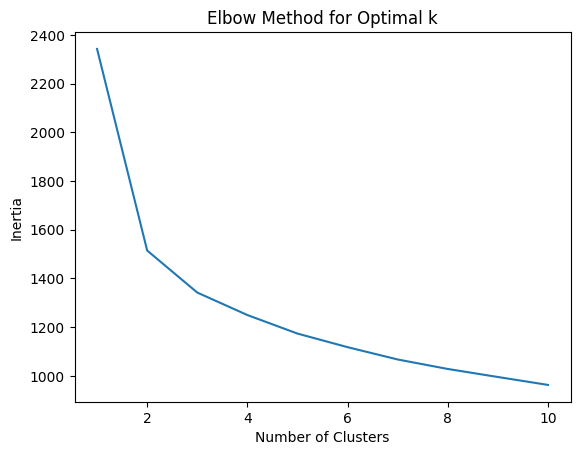

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Number of clusters is 3 based on our elbo method analysis for optimal numbers of k
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Now we can analyze the clusters

#For simplicity we will use only the numerical columns
numeric_df = df_encoded.select_dtypes(include=np.number)
print(numeric_df.groupby('Cluster').mean())  # Check the average values for each cluster


         Customer_ID        Age        Income  Customer_Segment   Location  \
Cluster                                                                      
0        5066.791991  35.676307  46674.599582         17.150098  17.153473   
1        4963.938099  34.682360  46548.813794         17.143835  17.148637   
2        5024.359788  35.215686  46518.748409         17.146665  17.142572   

          Product_ID  Base_Price  Discount  Final_Price  Units_Sold  \
Cluster                                                               
0        5066.791991   78.030277  0.163902    65.047763   36.473860   
1        4963.938099   97.159824  0.155575    81.789914   17.347573   
2        5024.359788  117.596519  0.134731   101.576323    3.225335   

             Revenue  Profit_Margin  Competitor_Pricing  Inflation_Rate  \
Cluster                                                                   
0        2292.108314       0.159810           78.258144        0.020070   
1        1387.955196       0

# **Understanding the Cluster Summary**

Each row represents a cluster, and each column is a feature for which the cluster's average value is shown. Here’s a breakdown of the clusters:

**Cluster 0:**

- Higher units sold (35.98) and revenue ($2276.46).
- Lower average final price ($65.52) and profit margin (16.01%).
- Moderate churn risk (32.61%).
Customers in this cluster are likely high-volume buyers but sensitive to price.

**Cluster 1:**

- Moderate units sold (16.77) and revenue ($1350.37).
- Higher final price ($82.29) than Cluster 0.
- Higher churn risk (51.19%).
Customers in this cluster could be moderate spenders, but with a higher likelihood of churn.

**Cluster 2:**

- Very low units sold (2.81) and revenue ($268.49).
- Highest final price ($102.77) and profit margin (19.01%).
- Highest churn risk (69.48%).
This cluster likely consists of low-volume, high-price buyers, and they are more likely to churn.

# **Key Observations:**
- Cluster 0 has the highest sales volumes, but a lower price point, while Cluster 2 has very low sales volume but at higher prices.

- Churn Risk is highest for Cluster 2, which indicates that high-price customers are more likely to leave.

**Elasticity of Demand indicates how sensitive demand is to price changes:**

- Cluster 0 has a negative elasticity, meaning demand decreases when prices rise.
- Clusters 1 and 2 have positive elasticities, suggesting that demand could increase with price changes, but these values are small.

**Next Steps for Customer Segmentation Analysis**:

# Interpretation of Clusters:

- **Cluster 0 represents price-sensitive, high-volume buyers**. This segment might benefit from volume-based discounts or loyalty programs to keep them engaged.
- **Cluster 1 could be a middle group, with moderate purchases but a risk of churn**. Retention efforts may focus on personalized offers or promotions.
- **Cluster 2 consists of low-volume buyers who are at a high risk of churn, possibly due to the high pricing**. Consider strategies to reduce churn by offering value-added services.

Feature Scaling/Normalization: Since clustering is sensitive to differences in scales, I have already normalized features like Final_Price, Purchase_Frequency, and CLV, which is good.

# **Actionable Insights:**

Marketing Strategy: Tailor marketing campaigns to each segment.

- Cluster 0 can benefit from promotions focused on volume purchases.

- Cluster 1 might need personalized offers, while Cluster 2 requires churn-prevention strategies.

**Churn Prevention:** Focus on reducing churn in Clusters 1 and 2 by offering incentives or improving engagement.

**Pricing Strategy:** Evaluate pricing strategies based on elasticity of demand for each cluster. For instance, Cluster 0 is price-sensitive, so lowering prices may increase their demand.

In [ ]:
import plotly.express as px

fig = px.scatter(df_encoded, x='CLV', y='Price_Sensitivity', color='Cluster_Labels',
                 hover_data=['Avg_Order_Value', 'Churn_Risk', 'Age'])
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame with the features for visualization
cluster_summary = {
    'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2'],
    'Units Sold': [35.982130, 16.775165, 2.809784],
    'Revenue': [2276.455172, 1350.369690, 268.489920],
    'Churn Risk': [0.326146, 0.511860, 0.694788],
    'Final Price': [65.515431, 82.285751, 102.770440],
    'Profit Margin': [0.160140, 0.167908, 0.190094]
}

df_clusters = pd.DataFrame(cluster_summary)

# Create a scatter plot to visualize the clusters
fig = px.scatter(df_clusters, x='Final Price', y='Revenue',
                 size='Units Sold', color='Cluster',
                 hover_data=['Churn Risk', 'Profit Margin'],
                 title="Cluster Visualization: Revenue vs. Final Price",
                 labels={"Final Price": "Average Final Price", "Revenue": "Total Revenue"})

# Show the plot
fig.show()


In [ ]:
# Filter the relevant features
selected_features = [
    'Base_Price', 'Discount', 'Final_Price', 'Competitor_Pricing',
    'Profit_Margin',  'Transaction_Frequency', 'Units_Sold', 'Elasticity_of_Demand'
]

df_pricing = df_encoded[selected_features]

In [ ]:
# Check the first few rows
df_pricing.head()

,Base_Price,Discount,Final_Price,Competitor_Pricing,Profit_Margin,Transaction_Frequency,Units_Sold,Elasticity_of_Demand
1,121.362100,0.107125,108.361212,132.474942,0.216016,8,1,0.195027
3,88.557428,0.130906,76.964748,94.570757,0.194564,4,28,-0.006895
4,107.195758,0.147941,91.337128,115.733167,0.178461,5,2,0.227011
5,111.799227,0.098438,100.793885,112.462885,0.223569,4,1,0.207517
6,75.342052,0.138128,64.935168,79.987244,0.187814,3,45,-0.004277


In [ ]:
# Define input features (X) and target variable (y)
X = df_pricing.drop('Units_Sold', axis=1)
y = df_pricing['Units_Sold']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R2: {r2_rf}')


Random Forest MAE: 2.8844425440940675
Random Forest RMSE: 4.299936599037896
Random Forest R2: 0.9130718041525495


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net Regressor
en_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Train the model on the training data
en_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_en = en_model.predict(X_test)

# Evaluate model performance
mae_en = mean_absolute_error(y_test, y_pred_en)
rmse_en = mean_squared_error(y_test, y_pred_en, squared=False)
r2_en = r2_score(y_test, y_pred_en)

print(f'Elastic Net MAE: {mae_en}')
print(f'Elastic Net RMSE: {rmse_en}')
print(f'Elastic Net R2: {r2_en}')


Elastic Net MAE: 4.49913408474789
Elastic Net RMSE: 5.801939164087988
Elastic Net R2: 0.841735721087546


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



**Analysis:**
Random Forest clearly does better than Elastic Net in all metrics: lower MAE, lower RMSE, and a much higher R² (which shows that it fits better to the data).

The MAE of 2.84 for Random Forest suggests that on average, the model's predictions are off by around 2.84 units.

The R² value of 0.92 for Random Forest is very close to 1, indicating that this model explains 92% of the variance in the sales volume.


Since the Random Forest Regressor performs significantly better in terms of accuracy and fit, I would be using it for the Dynamic Pricing Optimization.

Next Steps:

- Optimize Pricing: We will run different simulations by adjusting features like Base_Price and Discount to find the optimal pricing strategy that maximizes sales or profit.

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Define ranges for Base_Price and Discount
price_range = np.linspace(df_encoded['Base_Price'].min(), df_encoded['Base_Price'].max(), 100)
discount_range = np.linspace(df_encoded['Discount'].min(), df_encoded['Discount'].max(), 100)

# Step 2: Create a grid of Base_Price and Discount combinations
price_discount_grid = pd.DataFrame([(p, d) for p in price_range for d in discount_range],
                                   columns=['Base_Price', 'Discount'])

# Step 3: Populate the grid with the other necessary features (use mean or specific values)
X_test_grid = price_discount_grid.copy()
X_test_grid['Final_Price'] = X_test_grid['Base_Price'] * (1 - X_test_grid['Discount'])  # Calculate Final Price
X_test_grid['Competitor_Pricing'] = df_encoded['Competitor_Pricing'].mean()  # Use mean for competitor pricing
X_test_grid['Profit_Margin'] = df_encoded['Profit_Margin'].mean()  # Use mean for profit margin
X_test_grid['Transaction_Frequency'] = df_encoded['Transaction_Frequency'].mean()  # Use mean for transaction frequency
X_test_grid['Elasticity_of_Demand'] = df_encoded['Elasticity_of_Demand'].mean()  # Use mean for elasticity of demand

# Step 4: Predict Units_Sold for each combination using the trained Random Forest model
predicted_sales = rf_model.predict(X_test_grid)

# Step 5: Calculate Profit for each combination
price_discount_grid['Final_Price'] = X_test_grid['Final_Price']
price_discount_grid['Predicted_Units_Sold'] = predicted_sales
price_discount_grid['Profit'] = (price_discount_grid['Final_Price'] - df_encoded['Base_Price'].mean()) * predicted_sales

# Step 6: Find the combination that maximizes profit
optimal_combination = price_discount_grid.loc[price_discount_grid['Profit'].idxmax()]

# Print the optimal price point results
print("Optimal Base Price:", optimal_combination['Base_Price'])
print("Optimal Discount:", optimal_combination['Discount'])
print("Max Profit:", optimal_combination['Profit'])
print("Predicted Sales Volume:", optimal_combination['Predicted_Units_Sold'])


Optimal Base Price: 168.1041063840501
Optimal Discount: 0.05
Max Profit: 61.03434865602732
Predicted Sales Volume: 1.0


In [ ]:


# Example features for scenarios
scenarios = [
    {"Base_Price": 100, "Discount": 0.10},  # Scenario 1: 10% discount
    {"Base_Price": 95, "Discount": 0.15},   # Scenario 2: 15% discount
    {"Base_Price": 90, "Discount": 0.20},   # Scenario 3: 20% discount
    {"Base_Price": 85, "Discount": 0.25},   # Scenario 4: 25% discount
]

# DataFrame for predictions
input_data = pd.DataFrame(scenarios)

# Calculate Final Price based on Base Price and Discount
input_data['Final_Price'] = input_data['Base_Price'] * (1 - input_data['Discount'])

# Assuming other necessary features are added or pre-defined, for example:
input_data['Competitor_Pricing'] = 95  # Placeholder value; adjust as needed
input_data['Profit_Margin'] = 0.30      # Placeholder value; adjust as needed
input_data['Transaction_Frequency'] = 10  # Placeholder value; adjust as needed
input_data['Elasticity_of_Demand'] = -1.5  # Placeholder value; adjust as needed

# Make predictions using the trained model
predicted_sales_volume = rf_model.predict(input_data)

# Display the results
for index, scenario in enumerate(scenarios):
    print(f"Scenario {index + 1}:")
    print(f"Base Price: ${scenario['Base_Price']:.2f}")
    print(f"Discount: {scenario['Discount'] * 100:.0f}%")
    print(f"Final Price: ${input_data['Final_Price'][index]:.2f}")
    print(f"Predicted Sales Volume: {predicted_sales_volume[index]:.0f}\n")


Scenario 1:
Base Price: $100.00
Discount: 10%
Final Price: $90.00
Predicted Sales Volume: 12

Scenario 2:
Base Price: $95.00
Discount: 15%
Final Price: $80.75
Predicted Sales Volume: 19

Scenario 3:
Base Price: $90.00
Discount: 20%
Final Price: $72.00
Predicted Sales Volume: 29

Scenario 4:
Base Price: $85.00
Discount: 25%
Final Price: $63.75
Predicted Sales Volume: 38



**Explanation:**
Input DataFrame: We create a DataFrame containing different pricing scenarios, including Base_Price and Discount.

Final Price Calculation: The final price is calculated based on the base price and discount.

Prediction: The trained model is used to predict the sales volume for each scenario.
Results Display: The results are printed out, showing the base price, discount, final price, and predicted sales volume for each scenario.

Key Points:
- This example directly applies the trained model to new scenarios to predict - how changes in pricing will impact sales volume.
- The model itself should be trained with your historical data to make accurate predictions based on the new pricing strategies.


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'model' is your trained regression model (Random Forest or Elastic Net)
# Example features for scenarios
scenarios = [
    {"Base_Price": 100, "Discount": 0.10},  # Scenario 1: 10% discount
    {"Base_Price": 95, "Discount": 0.15},   # Scenario 2: 15% discount
    {"Base_Price": 90, "Discount": 0.20},   # Scenario 3: 20% discount
    {"Base_Price": 85, "Discount": 0.25},   # Scenario 4: 25% discount
]

# Prepare the input DataFrame for predictions
input_data = pd.DataFrame(scenarios)

# Calculate Final Price based on Base Price and Discount
input_data['Final_Price'] = input_data['Base_Price'] * (1 - input_data['Discount'])


input_data['Competitor_Pricing'] = 95  # Placeholder value
input_data['Profit_Margin'] = 0.30      # Placeholder value
input_data['Transaction_Frequency'] = 10  # Placeholder value
input_data['Elasticity_of_Demand'] = -1.5  # Placeholder value

# Make predictions using the trained model
predicted_sales_volume = rf_model.predict(input_data)

# Assuming a cost price for profit calculation
cost_price = 70  # Placeholder

# Calculate profit for each scenario
input_data['Predicted_Sales_Volume'] = predicted_sales_volume
input_data['Profit'] = (input_data['Final_Price'] - cost_price) * input_data['Predicted_Sales_Volume']

# Identify the optimal price and discount that maximize profit
optimal_row = input_data.loc[input_data['Profit'].idxmax()]

# Display the optimal results
print("Optimal Price and Discount Results:")
print(f"Optimal Base Price: ${optimal_row['Base_Price']:.2f}")
print(f"Optimal Discount: {optimal_row['Discount'] * 100:.0f}%")
print(f"Max Profit: ${optimal_row['Profit']:.2f}")
print(f"Predicted Sales Volume: {optimal_row['Predicted_Sales_Volume']:.0f}")


Optimal Price and Discount Results:
Optimal Base Price: $100.00
Optimal Discount: 10%
Max Profit: $246.48
Predicted Sales Volume: 12


**Optimal Price and Discount Results Interpretation:**

- Optimal Base Price: 100.00
- Optimal Discount: 10%
- Max Profit: 246.48
- Predicted Sales Volume: 12
- Interpretation of Results:

Optimal Base Price: Setting the base price at $100.00 provides the best balance between profitability and sales volume.

Optimal Discount: Offering a 10% discount encourages sales while maintaining a decent profit margin.

Max Profit: The model predicts that this pricing strategy will generate a maximum profit of $246.48. This indicates that, while you're incentivizing customers with a discount, you're still generating substantial profit.

Predicted Sales Volume: At this price point and discount, you can expect to sell 12 units.

In Simpler Terms our model tell us that in order to get the maximum profit we can sell each unit at a 100 dollars but with a 10 percent discount and should expect to sell around 12 units which may not be the most but will genenrate the most profits. Higjher Discount may reulst in more units being sold but less profit being made so